In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('datos_df_1.csv')
df.head()

,Index,Body Temp,Room Temp,Pressure
0,1,26.285,26.06472,86434.94
1,2,26.285,26.06472,86435.55
2,3,26.270,26.07985,86435.55
3,4,26.260,26.06472,86434.63
4,5,26.245,26.06472,86434.33


In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,Index,Body Temp,Room Temp,Pressure
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,30.146950,26.178971,86434.476397
std,57.879185,3.123146,0.071111,0.597096
min,1.000000,26.185000,26.049840,86433.410000
25%,50.750000,26.890750,26.109850,86434.020000
50%,100.500000,30.023000,26.184730,86434.609910
75%,150.250000,33.050500,26.241132,86434.940000
max,200.000000,35.150000,26.304740,86435.550000


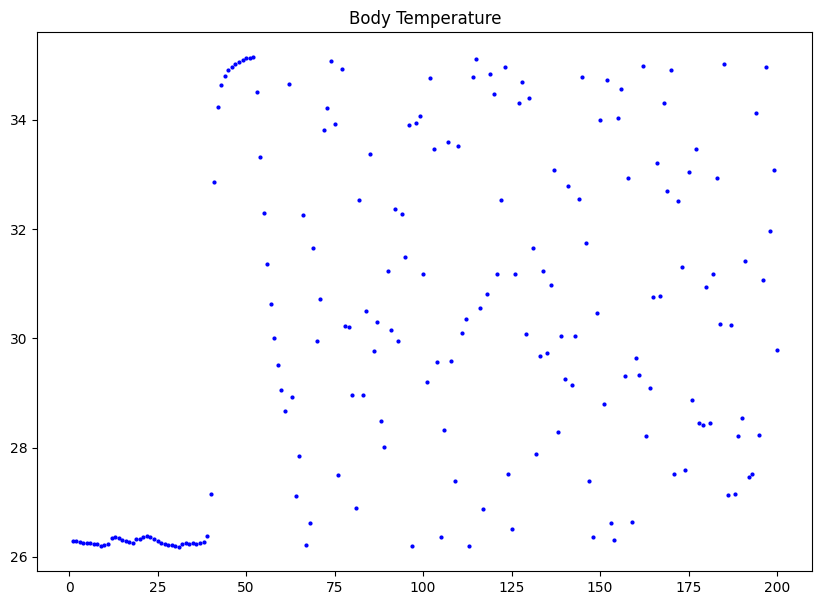

In [ ]:
# Search for outliers
# Visualize temp information on plot scatters
plt.figure(figsize=(10,7))
# Plot temperature data
plt.scatter(df['Index'], df['Body Temp'], c='b', s=4, label="Body Temperature")
# Plot title
plt.title("Body Temperature")
# Show the plot
plt.show()

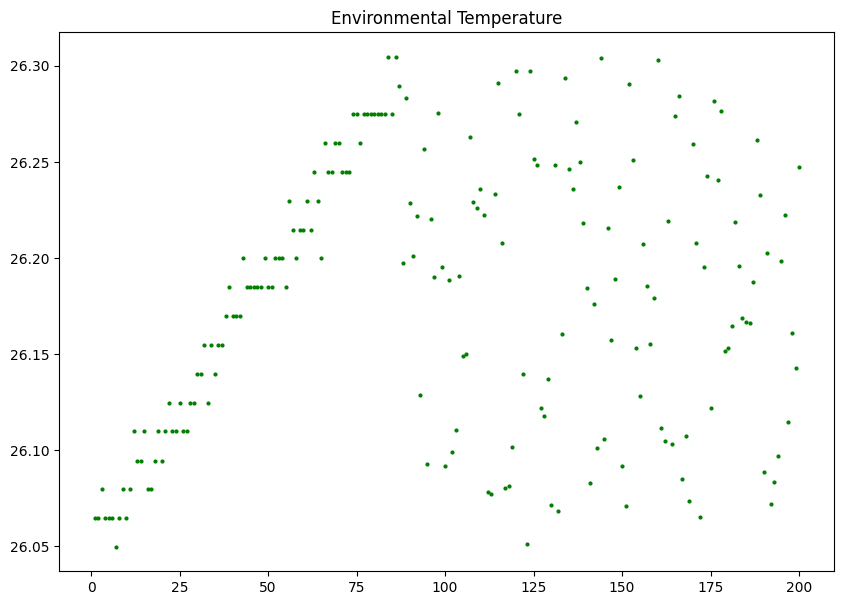

In [ ]:
# Search for outliers
plt.figure(figsize=(10,7))
# Plot temperature data
plt.scatter(df['Index'], df['Room Temp'], c='g', s=4, label="Environmental Temperature")
# Plot title
plt.title("Environmental Temperature")
# Show the plot
plt.show()

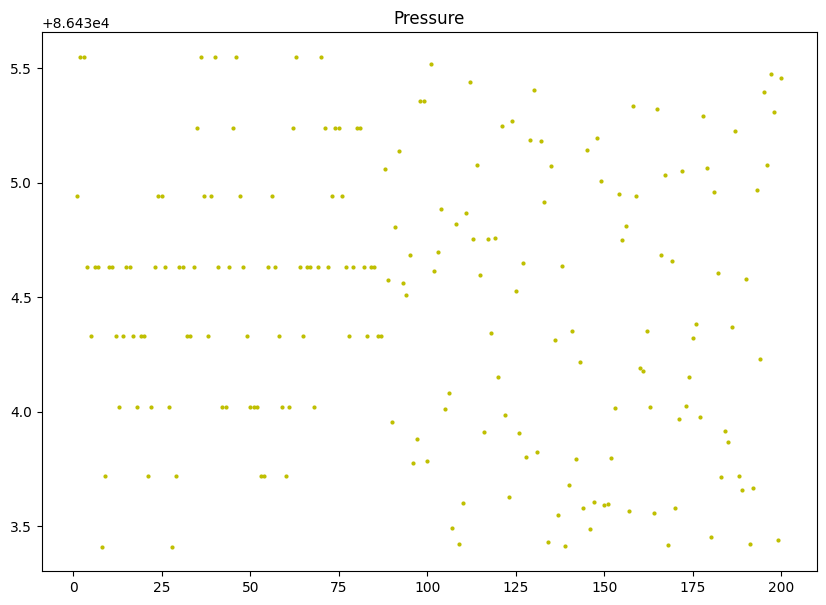

In [ ]:
# Search for outliers
plt.figure(figsize=(10,7))
# Plot temperature data
plt.scatter(df['Index'], df['Pressure'], c='y', s=4, label="Pressure")
# Plot title
plt.title("Pressure")
# Show the plot
plt.show()

In [ ]:
# Look for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   Body Temp  200 non-null    float64
 2   Room Temp  200 non-null    float64
 3   Pressure   200 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [ ]:
# Add pytorch attributes
import torch
from torch import nn

In [ ]:
# Prepare data
X1_seg = df['Body Temp'].to_numpy()
X2_seg = df['Room Temp'].to_numpy()
X3_seg = df['Pressure'].to_numpy()
X1_seg[:5], X2_seg[:5], X3_seg[:5]

(array([26.285, 26.285, 26.27 , 26.26 , 26.245]),
 array([26.06472, 26.06472, 26.07985, 26.06472, 26.06472]),
 array([86434.94, 86435.55, 86435.55, 86434.63, 86434.33]))

In [ ]:
# We already now it's a float64
X1_seg.dtype, X2_seg.dtype, X3_seg.dtype

(dtype('float64'), dtype('float64'), dtype('float64'))

In [ ]:
# Convert to tensors
X1_tensor = torch.from_numpy(X1_seg).unsqueeze(dim=1)
X2_tensor = torch.from_numpy(X2_seg).unsqueeze(dim=1)
X3_tensor = torch.from_numpy(X3_seg).unsqueeze(dim=1)

X1_tensor[:5], X2_tensor[:5], X3_tensor[:5]

(tensor([[26.2850],
         [26.2850],
         [26.2700],
         [26.2600],
         [26.2450]], dtype=torch.float64),
 tensor([[26.0647],
         [26.0647],
         [26.0799],
         [26.0647],
         [26.0647]], dtype=torch.float64),
 tensor([[86434.9400],
         [86435.5500],
         [86435.5500],
         [86434.6300],
         [86434.3300]], dtype=torch.float64))

In [ ]:
# Interchange and simplify float format
X1 = X1_tensor.type(torch.float32)
X2 = X2_tensor.type(torch.float32)
X3 = X3_tensor.type(torch.float32)

X1.dtype, X2.dtype, X3.dtype

(torch.float32, torch.float32, torch.float32)

In [ ]:
# Set weights and bias
weight = torch.tensor([[3.0],
                  [4.0],
                  [2.0]],
                 requires_grad=True)
bias = torch.tensor([[1.0]],
                    requires_grad=True)

In [ ]:
weight.shape

torch.Size([3, 1])

In [ ]:
# Define a forward function for y_preds
def forward_y(x):
  y_pred = torch.mm(x, weight) + bias
  return y_pred

In [ ]:
# Convert tensor into a unique [3, 1] shape for three variables
new_tensor = torch.tensor([[X1[0], X2[0], X3[0]]])
new_tensor

tensor([[2.6285e+01, 2.6065e+01, 8.6435e+04]])

In [ ]:
new_tensor.shape

torch.Size([1, 3])

In [ ]:
# Convert all three tensors